# Text Skew
[Text skew correction with OpenCV and Python](https://www.pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/)

In [2]:
import os
os.environ["OPENBLAS_CORETYPE"] ="Skylake"
os.getenv("OPENBLAS_CORETYPE")

import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

Pierwszy krok: wczytanie i progowanie wartośći pikseli na obrazku

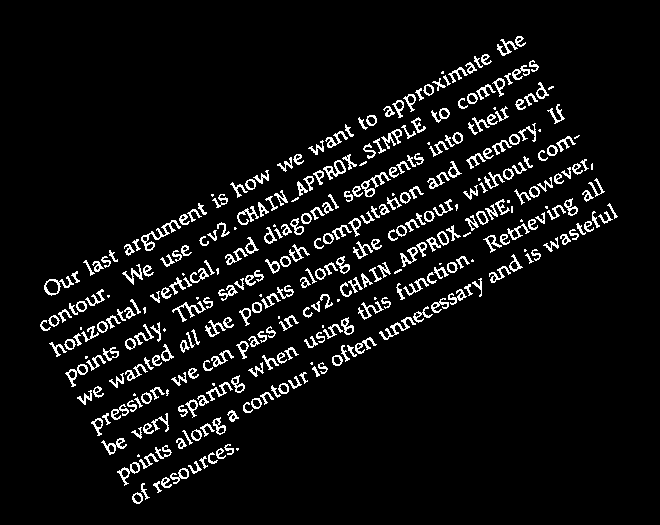

In [3]:
image = cv2.imread('img/text-skew/neg_28.png')
img = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)  # ???
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

Image.fromarray(thresh)

In [4]:
# imgplot = plt.imshow(image)
# plt.show()

### Momenty

Definition of moments in image processing is borrowed from physics. Assume that each pixel in image has weight that is equal to its intensity. Then the point you defined is centroid (a.k.a. center of mass) of image.

Assume that I(x,y) is the intensity of pixel (x,y) in image. Then m(i,j) is the sum for all possible x and y of: I(x,y) * (x^i) * (y^j).

Here you can read the documentation of moments used in OpenCV. They are called raw moments.

Wiki article about [all kinds of image moments](https://en.wikipedia.org/wiki/Image_moment) (raw moments, central moments, scale/rotation invariant moments and so on). It is pretty good one and I recommend reading it.

### CvBox2D
A CvBox2D object is defined by its center, size and angle, as you correctly assumed, as described 
* center - Center of the box
* size - Box width and height
* angle - Angle between the horizontal axis and the first side (i.e. length) in degrees




center (y,x): [266 328] size (w,h): [566 240] angle: -61.99082565307617


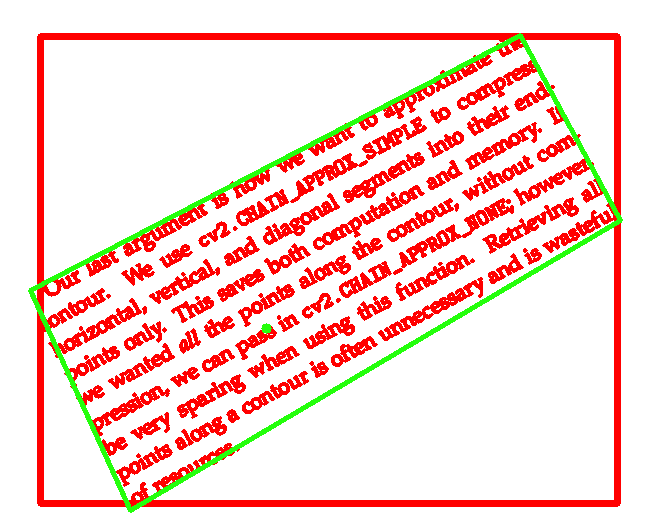

In [145]:
def order_points(pts):
    # rect =  [top-left,
    #          top-right, 
    #          bottom-right,
    #          bottom-left]
    rect = np.zeros((4, 2), dtype = "float32")
    
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    print('r0', rect[0])
    return np.int0(rect)  # float -> int

box = np.array([[130,510],
                [620,220],
                [520,35],
                [30,290]], np.int0)

# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates

coords = np.column_stack(np.where(thresh > 0))
# print(coords[:15])

for c in coords:
    cv2.circle(image, (c[1],c[0]) , 1, (255,0,0), -1)
    
# print(max(y), min(x), min(y), max(x))

cv2.rectangle(image, (max(y), min(x)), (min(y),max(x)), (255,0,0), 5 )
cv2.drawContours(image, [box], 0, (36,255,12), 3) # OR

center, size, angle = cv2.minAreaRect(coords)
# the `cv2.minAreaRect` function returns angel values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle


center = np.int0(center)
size = np.int0(size)

cv2.circle(image, (center[0],center[1]) , 5, (36,255,12), -1)

# cv2.circle(image, (517,36) , 10, (255,0,0), -1)
# cv2.circle(image, (139,503) , 10, (255,0,0), -1)
print('center (y,x):', center, 'size (w,h):', size, 'angle:', angle)
Image.fromarray(image)

In [146]:
if angle < -45:
	angle = -(90 + angle)
# otherwise, just take the inverse of the angle to make
# it positive
else:
	angle = -angle

TODO:
   * Draw Bounding Box

[INFO] cente: (330, 262)
[INFO] angle: -28.009


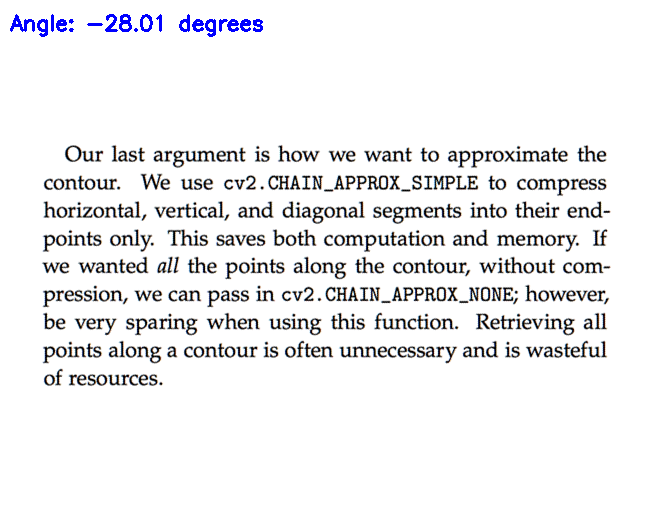

In [149]:
# rotate the image to deskew it
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# draw the correction angle on the image so we can validate it
cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
# show the output image
print(f"[INFO] cente: {center}")
print("[INFO] angle: {:.3f}".format(angle))

Image.fromarray(rotated)

## Appendix: Treshold

## Appendix: BoundingBox